In [1]:
### Importamos las librerias necesarias para la exploración de datos
# Pandas: Libreria para el manejo de datos
# Numpy: Libreria para el manejo de arreglos
# Matplotlib: Libreria para la visualización de datos
# Seaborn: Libreria para la visualización de datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Graficos interactivos
# Plotly: Libreria para la visualización de datos interactivos
import plotly.express as px
import plotly.subplots as sp



In [2]:
# De no tener instalada plotly, ejecutar el siguiente comando 
!pip install plotly
!pip install --upgrade nbformat

In [3]:
### Configuramos los parametros graficos
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (12,4)

# Exploración 

## 0. Entendimiento del signficado de las columnas

In [4]:
pd.set_option('display.max_rows', None)
codebook = pd.read_csv('https://raw.githubusercontent.com/sarasti2/AI_UdeA_2023-2/main/dataset/codebook.csv')
print(codebook)


       Variable name                               Variable description
0               v2a1                               Monthly rent payment
1             hacdor                        =1 Overcrowding by bedrooms
2              rooms                   number of all rooms in the house
3             hacapo                           =1 Overcrowding by rooms
4               v14a                     =1 has toilet in the household
5             refrig               =1 if the household has refrigerator
6               v18q                                      owns a tablet
7              v18q1                   number of tablets household owns
8               r4h1                 Males younger than 12 years of age
9               r4h2                    Males 12 years of age and older
10              r4h3                       Total males in the household
11              r4m1               Females younger than 12 years of age
12              r4m2                  Females 12 years of age an

Pregunta a la que responden las variables categoricas:

1. ¿Que tipo de hacinamiento tiene? 'hacdor' y 'hacapo'

2. ¿Que tienen los hogares? 'v14a', 'refrig', 'v18q', 'computer', 'television', 'mobilephone'

3. ¿De que estan hechos los hogares?

    3.1 Paredes: 'paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother'

    3.2 Pisos: 'pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera'

    3.3 Techos: 'techozinc', 'techoentrepiso', 'techocane', 'techootro'

4. ¿Como acceden a los servicios publicos?

    4.1 Agua: 'abastaguadentro', 'abastaguafuera', 'abastaguano'

    4.2 Electricidad: 'public', 'planpri', 'noelec', 'coopele'

    4.3 Saneamiento: 'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6'

    4.4 Energía para cocinar: 'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4'

    4.5 Gestión de residuos: 'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6'

5. ¿Cual es el estado de la vivienda?

    5.1 Paredes: 'epared1', 'epared2', 'epared3'

    5.2 Techo: 'etecho1', 'etecho2', 'etecho3'

    5.3 Piso: 'eviv1', 'eviv2', 'eviv3'

6. ¿Cual es la composición de las familias en las viviendas?

    6.1 ¿En el hogar hay personas con discapacidad? 'dis'

    6.2 ¿Cual es el genero de las personas de la vivienda? 'male', 'female'

    6.3 ¿Cual es el estado civil de las personas de la vivienda? 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7'

7. ¿Cual es el nivel educativo de las personas de la vivienda? 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9'

8. ¿La vivienda es propiedad de la familia? 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5'

9. ¿Cual es la ubicación de la vivienda? 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6'

    9.1 ¿Es una ubicación urbana o rural? 'area1', 'area2'

## 1. Lectura y revisión inicial

In [5]:
### Importamos los datos de entrenamiento y testeo
train = pd.read_csv('https://raw.githubusercontent.com/sarasti2/AI_UdeA_2023-2/main/dataset/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/sarasti2/AI_UdeA_2023-2/main/dataset/test.csv')

In [6]:
print('Tamaño de los datos de entrenamiento [filas, Columnas]: ', train.shape)
print('Tamaño de los datos de testeo [filas, Columnas]: ', test.shape)

Tamaño de los datos de entrenamiento [filas, Columnas]:  (9557, 143)
Tamaño de los datos de testeo [filas, Columnas]:  (23856, 142)


In [7]:
train.sample(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
1722,ID_d117fdf24,NaN,0,7,0,1,1,0,NaN,2,...,36,1156,25,0,4,1.562500,16.00,58.777775,1156,1
8054,ID_e62f26a9f,NaN,0,5,0,1,1,0,NaN,0,...,36,144,25,25,9,2.777778,2.25,9.000000,144,1
4659,ID_01851fd00,250000.0,0,4,0,1,1,0,NaN,0,...,64,729,9,0,0,2.250000,0.00,128.444440,729,4
2113,ID_6c00e8e2c,NaN,0,6,0,1,1,1,3.0,0,...,196,4225,25,225,4,2.777778,2.25,205.444440,4225,4
3286,ID_4140dd590,100000.0,0,5,0,1,1,0,NaN,1,...,0,0,16,36,9,5.444444,9.00,256.000000,0,2


In [8]:
test.sample(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
7593,ID_3213e9049,NaN,0,5,0,1,1,0,NaN,0,...,30,121,900,9,81,0,2.250000,0.000000,49.0,900
2410,ID_ef392e455,250000.0,0,4,0,1,1,1,1.0,0,...,15,64,225,9,225,4,2.250000,4.000000,225.0,225
15600,ID_d1faa4479,NaN,0,7,0,1,1,0,NaN,0,...,56,36,3136,16,9,1,1.777778,1.000000,25.0,3136
23371,ID_19853bac6,NaN,0,2,1,1,1,0,NaN,1,...,0,0,0,25,25,9,6.250000,2.250000,64.0,0
19555,ID_12633d8d1,NaN,0,3,0,1,0,0,NaN,0,...,36,36,1296,25,1,0,6.250000,0.444444,16.0,1296


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


**Datos faltantes**

La exploración a partir de este punto se hara solo con los datos de entrenamiento

In [11]:
#Buscaremos las columnas que tienen valores nulos, y que porcentaje de cada columna es nulo
train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0]

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

## 2. Niveles de pobreza (Variable objetivo)

In [12]:
# Creamos un dataframe con el conteo de cada categoria en la columna 'Target'
target = train['Target'].value_counts().to_frame()
target = target.set_index([['No vulnerable', 'Vulnerable', 'Moderadamente pobre', 'Extremadamente pobre']]) 
target

,count
No vulnerable,5996
Vulnerable,1597
Moderadamente pobre,1209
Extremadamente pobre,755


In [13]:
# Graficamos el conteo de cada categoria en la columna 'Target'
fig = px.bar(target, x=target.index, y='count', title='Niveles de pobreza')
fig.update_layout(xaxis_title="Nivel de pobreza", yaxis_title="Número de personas")
fig.show()


Se observa que la variable objetivo es desbalanceada, por lo que se deberá tener cuidado al momento de evaluar los modelos.

## 3. Variables categóricas 

### 3.1 ¿Que tipo de hacinamiento tiene? 

In [14]:
hac = train.groupby(['Target'])[['hacdor']].sum().merge(train.groupby(['Target'])[['hacapo']].sum(), on = 'Target')
hac = hac.set_index([['Extremadamente pobre', 'Moderadamente pobre', 'Vulnerable', 'No vulnerable']])
hac = hac.rename(columns = {'hacdor':'Hacinamiento dormitorios', 'hacapo':'Hacinamiento cuartos'})
hac = hac.T
fig = px.bar(hac, x=hac.index, y=hac.columns, title='Hacinamiento', barmode='group')
fig.update_layout(xaxis_title="Tipo de hacinamiento", yaxis_title="Número de personas")

In [15]:
#Graficaremos solo hacinamiento en dormitorios para verlo mejor
hac_dorm = hac.loc[['Hacinamiento dormitorios']].T
fig = px.bar(hac_dorm,x = hac_dorm.index, y = hac_dorm.columns, title='Hacinamiento en dormitorios',)
fig.update_layout(xaxis_title="Tipo de hacinamiento", yaxis_title="Número de personas")
fig.show()

### 3.2 ¿Que electrodomesticos o dispositivos electronicos tienen los hogares?



In [16]:
# Función para agrupar las columnas por el nivel de pobreza
def groupby_target(df, colums, names):
    df_n = df.groupby(['Target'])[[colums[0]]].sum()
    for i in colums[1:]:
        df_n = df.groupby(['Target'])[[i]].sum().merge(df_n, on = 'Target')
    df_n = df_n.rename(columns = {colums[0]:names[0]})
    df_n = df_n.set_index([['Extremadamente pobre', 'Moderadamente pobre', 'Vulnerable', 'No vulnerable']])
    names = zip(colums, names)
    df_n = df_n.rename(columns = dict(names))
    return df_n.T

# Función para sacar el porcentaje de cada categoria en el nivel de pobreza
def groupby_target_por(df, colums, names):
    df_n = df.groupby(['Target'])[[colums[0]]].sum()/df.groupby(['Target'])[[colums[0]]].count()
    for i in colums[1:]:
        df_n = (df.groupby(['Target'])[[i]].sum()/df.groupby(['Target'])[[i]].count()).merge(df_n, on = 'Target')
    df_n = df_n.set_index([['Extremadamente pobre', 'Moderadamente pobre', 'Vulnerable', 'No vulnerable']])
    names = zip(colums, names)
    df_n = df_n.rename(columns = dict(names))
    return df_n.T

In [17]:
columnas = ['v14a', 'refrig', 'v18q', 'computer', 'television', 'mobilephone']
nombres = ['Tiene baño', 'Tiene refrigerador', 'Tiene tablet', 'Tiene computador', 'Tiene TV', 'Tiene celular']
pos = groupby_target(train, columnas, nombres)


In [18]:
fig = px.bar(pos, x=pos.index, y=pos.columns, title='Posesiones', barmode='group')
fig.update_layout(xaxis_title="Posee", yaxis_title="Número de personas")
fig.show()

In [19]:
pos_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(pos_por, x=pos_por.index, y=pos_por.columns, title='Posesiones', barmode='group')
fig.update_layout(xaxis_title="Posee", yaxis_title="Porcentaje de personas")
fig.show()

### 3.3 ¿De que estan hechos los hogares?

#### 3.3.1 Paredes

In [20]:
columnas = ['paredblolad', 'paredzocalo', 'paredpreb', 'pareddes', 'paredmad', 'paredzinc', 'paredfibras', 'paredother']
nombres = ['Pared de bloques/bloques de cemento', 'Pared de zócalo', 'Pared de prefabricado', 'Pared de desechos', 'Pared de madera', 'Pared de zinc', 'Pared de fibra de cemento', 'Otro tipo de pared']
pared = groupby_target(train, columnas, nombres)
fig = px.bar(pared, x=pared.index, y=pared.columns, title='Tipo de pared')
fig.update_layout(xaxis_title="Tipo de pared", yaxis_title="Número de personas")
fig.show()

In [21]:
pared_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(pared_por, x=pared_por.index, y=pared_por.columns, title='Tipo de pared')
fig.update_layout(xaxis_title="Tipo de pared", yaxis_title="Porcentaje de personas")
fig.show()

#### 3.3.2 Pisos

In [22]:
columnas = ['pisomoscer', 'pisocemento', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera']
nombres = ['Piso de mosaico/cerámica', 'Piso de cemento', 'Otro tipo de piso', 'Piso de material natural', 'No tiene piso', 'Piso de madera']
piso = groupby_target(train, columnas, nombres)
fig = px.bar(piso, x=piso.index, y=piso.columns, title='Tipo de piso')
fig.update_layout(xaxis_title="Tipo de piso", yaxis_title="Número de personas")
fig.show()

In [23]:
piso_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(piso_por, x=piso_por.index, y=piso_por.columns, title='Tipo de piso')
fig.update_layout(xaxis_title="Tipo de piso", yaxis_title="Porcentaje de personas")
fig.show()

#### 3.3.3 Techos

In [24]:
columnas = ['techozinc', 'techoentrepiso', 'techocane', 'techootro']
nombres = ['Techo de zinc', 'Techo de entrepiso', 'Techo de caña', 'Otro tipo de techo']
techo = groupby_target(train, columnas, nombres)
fig = px.bar(techo, x=techo.index, y=techo.columns, title='Tipo de techo')
fig.update_layout(xaxis_title="Tipo de techo", yaxis_title="Número de personas")
fig.show()


In [25]:
techo_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(techo_por, x=techo_por.index, y=techo_por.columns, title='Tipo de techo')
fig.update_layout(xaxis_title="Tipo de techo", yaxis_title="Porcentaje de personas")
fig.show()

### 3.4 ¿Como acceden a los servicios publicos?

#### 3.4.1 Agua

In [26]:
columnas = ['abastaguadentro', 'abastaguafuera', 'abastaguano']
nombres = ['Tiene agua dentro de la vivienda', 'Tiene agua fuera de la vivienda', 'No tiene agua']
agua = groupby_target(train, columnas, nombres)
fig = px.bar(agua, x=agua.index, y=agua.columns, title='Abastecimiento de agua')
fig.update_layout(xaxis_title="Abastecimiento de agua", yaxis_title="Número de personas")
fig.show()


In [27]:
agua_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(agua_por, x=agua_por.index, y=agua_por.columns, title='Abastecimiento de agua')
fig.update_layout(xaxis_title="Abastecimiento de agua", yaxis_title="Porcentaje de personas")
fig.show()

#### 3.4.2 Electricidad


In [28]:
columnas = ['public', 'planpri', 'noelec', 'coopele']
nombres = ['Conexión pública', 'Conexión privada', 'No tiene conexión', 'Cooperativa eléctrica']
elect = groupby_target(train, columnas, nombres)
fig = px.bar(elect, x=elect.index, y=elect.columns, title='Electricidad')
fig.update_layout(xaxis_title="Electricidad", yaxis_title="Número de personas")
fig.show()


In [29]:
elect_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(elect_por, x=elect_por.index, y=elect_por.columns, title='Electricidad')
fig.update_layout(xaxis_title="Electricidad", yaxis_title="Porcentaje de personas")
fig.show()

#### 3.4.3 Saneamiento

In [30]:
columnas = ['sanitario1', 'sanitario2', 'sanitario3', 'sanitario5', 'sanitario6']
nombres = ['Inodoro conectado a la red pública', 'Inodoro conectado a fosa séptica', 'Inodoro conectado a pozo séptico', 'Inodoro conectado a letrina', 'Inodoro sin conexión']
san = groupby_target(train, columnas, nombres)
fig = px.bar(san, x=san.index, y=san.columns, title='Tipo de inodoro')
fig.update_layout(xaxis_title="Tipo de saneamiento", yaxis_title="Número de personas")
fig.show()

In [31]:
san_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(san_por, x=san_por.index, y=san_por.columns, title='Tipo de inodoro')
fig.update_layout(xaxis_title="Tipo de inodoro", yaxis_title="Porcentaje de personas")
fig.show()

#### 3.4.4 Energía para cocinar

In [32]:
columnas = ['energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4']
nombres = ['No tiene una fuente principal', 'Usa electricidad', 'Usa gas', 'Usa madera']
coc = groupby_target(train, columnas, nombres)
fig = px.bar(coc, x=coc.index, y=coc.columns, title='Fuente de cocina')
fig.update_layout(xaxis_title="Fuente de cocina", yaxis_title="Número de personas")
fig.show()


In [33]:
coc_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(coc_por, x=coc_por.index, y=coc_por.columns, title='Fuente de cocina')
fig.update_layout(xaxis_title="Fuente de cocina", yaxis_title="Porcentaje de personas")
fig.show()

#### 3.4.5 Gestión de residuos

In [34]:
columnas = ['elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 'elimbasu5', 'elimbasu6']
nombres = ['Tiene servicio de recolección pública', 'Entierra la basura', 'Quema la basura', 'Tira la basura a un lugar desocupado ','Tira la basura en un río, lago u mar', 'Otra forma']
bas = groupby_target(train, columnas, nombres)
fig = px.bar(bas, x=bas.index, y=bas.columns, title='Gestión de residuos')
fig.update_layout(xaxis_title="Eliminación de basura", yaxis_title="Número de personas")
fig.show()

In [35]:
bas_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(bas_por, x=bas_por.index, y=bas_por.columns, title='Gestión de residuos')
fig.update_layout(xaxis_title="Eliminación de basura", yaxis_title="Porcentaje de personas")
fig.show()

### 3.5 ¿Cual es el estado de la vivienda?

En esta sección se usaron barras separadas para mostrar el porcentaje, debido a que en este caso la diferencia es notable

#### 3.5.1 Paredes

In [36]:
columnas = ['epared1', 'epared2', 'epared3']
nombres = ['Paredes exteriores en mal estado', 'Paredes exteriores en regular estado', 'Paredes exteriores en buen estado']
epared = groupby_target(train, columnas, nombres)
fig = px.bar(epared, x=epared.index, y=epared.columns, title='Estado de las paredes')
fig.update_layout(xaxis_title="Estado de las paredes", yaxis_title="Número de personas")
fig.show()

In [37]:
epared_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(epared_por, x=epared_por.index, y=epared_por.columns, title='Estado de las paredes', barmode='group')
fig.update_layout(xaxis_title="Estado de las paredes", yaxis_title="Porcentaje de personas")
fig.show()

#### 3.5.2 Techo

In [38]:
columnas = ['etecho1', 'etecho2', 'etecho3']
nombres = ['Techo en mal estado', 'Techo en regular estado', 'Techo en buen estado']
etecho = groupby_target(train, columnas, nombres)
fig = px.bar(etecho, x=etecho.index, y=etecho.columns, title='Estado del techo')
fig.update_layout(xaxis_title="Estado del techo", yaxis_title="Número de personas")
fig.show()


In [39]:
etecho_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(etecho_por, x=etecho_por.index, y=etecho_por.columns, title='Estado del techo')
fig.update_layout(xaxis_title="Estado del techo", yaxis_title="Porcentaje de personas", barmode='group')
fig.show()


#### 3.5.3 Piso

In [40]:
columnas = ['eviv1', 'eviv2', 'eviv3']
nombres = ['Piso en mal estado', 'Piso en regular estado', 'Piso en buen estado']
eviv = groupby_target(train, columnas, nombres)
fig = px.bar(eviv, x=eviv.index, y=eviv.columns, title='Estado del piso')
fig.update_layout(xaxis_title="Estado del piso", yaxis_title="Número de personas")
fig.show()

In [41]:
piso_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(piso_por, x=piso_por.index, y=piso_por.columns, title='Estado del piso', barmode='group')
fig.update_layout(xaxis_title="Estado del piso", yaxis_title="Porcentaje de personas")
fig.show()

### 3.6 ¿Cual es la composición de las familias en las viviendas?

#### 3.6.1 ¿En el hogar hay personas con discapacidad?


In [42]:
columnas = ['dis']
nombres = ['Hogares con discapacitados']
disc = groupby_target(train, columnas, nombres)
fig = px.bar(disc, x=disc.index, y=disc.columns, title='Discapacitados')
fig.update_layout(xaxis_title="Discapacitados", yaxis_title="Número de personas", barmode='group')
fig.show()

In [43]:
disc_por = groupby_target_por(train, columnas, nombres) 
fig = px.bar(disc_por, x=disc_por.index, y=disc_por.columns, title='Discapacitados')
fig.update_layout(xaxis_title="Discapacitados", yaxis_title="Porcentaje de personas", barmode='group')
fig.show()

#### 3.6.3 ¿Cual es el estado civil de las personas de la vivienda?


In [44]:
columnas = ['estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7']
nombres = ['>10 años', 'Unión libre', 'Casado/a', 'Divorciado/a', 'Separado/a', 'Viudo/a', 'Soltero/a']
est = groupby_target(train, columnas, nombres)
fig = px.bar(est, x=est.index, y=est.columns, title='Estado civil')
fig.update_layout(xaxis_title="Estado civil", yaxis_title="Número de personas")
fig.show()

In [45]:
est_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(est_por, x=est_por.index, y=est_por.columns, title='Estado civil')
fig.update_layout(xaxis_title="Estado civil", yaxis_title="Porcentaje de personas")
fig.show()

### 3.7 ¿Cual es el nivel educativo de las personas de la vivienda?


In [46]:
columnas = ['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9']
nombres = ['Sin educación','Primaria incompleta', 'Primaria', 'Secundaria incompleta','Secundaria', 'Tecnica incompleta', 'Técnica', 'Pregrado', 'Posgrado']
inst = groupby_target(train, columnas, nombres)
fig = px.bar(inst, x=inst.index, y=inst.columns, title='Nivel educativo')
fig.update_layout(xaxis_title="Nivel educativo", yaxis_title="Número de personas")
fig.show()

In [47]:
inst_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(inst_por, x=inst_por.index, y=inst_por.columns, title='Nivel educativo', barmode='group')
fig.update_layout(xaxis_title="Nivel educativo", yaxis_title="Porcentaje de personas")
fig.show()

### 3.8 ¿La vivienda es propiedad de la familia?

In [48]:
columnas = ['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']
nombres = ['Casa propia', 'Pagando cuotas', 'Alquilada', 'Precaria', 'Prestada/Asignada']
tip = groupby_target(train, columnas, nombres)
fig = px.bar(tip, x=tip.index, y=tip.columns, title='Tipo de vivienda')
fig.update_layout(xaxis_title="Tipo de vivienda", yaxis_title="Número de personas")
fig.show()


In [49]:
tipo_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(tipo_por, x=tipo_por.index, y=tipo_por.columns, title='Tipo de vivienda')
fig.update_layout(xaxis_title="Tipo de vivienda", yaxis_title="Porcentaje de personas")
fig.show()

### 3.9 ¿Cual es la ubicación de la vivienda?

In [50]:
columnas = ['lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6']
nombres = ['Central', 'Chorotega', 'Pacífico central', 'Brunca', 'Huetar Atlántica', 'Huetar Norte']
lug = groupby_target(train, columnas, nombres)
fig = px.bar(lug, x=lug.index, y=lug.columns, title='Región')
fig.update_layout(xaxis_title="Región", yaxis_title="Número de personas")
fig.show()

In [51]:
lug_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(lug_por, x=lug_por.index, y=lug_por.columns, title='Región')
fig.update_layout(xaxis_title="Región", yaxis_title="Porcentaje de personas", barmode='group')
fig.show()

#### 3.9.1 ¿Es una ubicación urbana o rural?

In [52]:
columnas = ['area1', 'area2']
nombres = ['Urbana', 'Rural']
area = groupby_target(train, columnas, nombres)
fig = px.bar(area, x=area.index, y=area.columns, title='Área')
fig.update_layout(xaxis_title="Área", yaxis_title="Número de personas")
fig.show()

In [53]:
area_por = groupby_target_por(train, columnas, nombres)
fig = px.bar(area_por, x=area_por.index, y=area_por.columns, title='Área')
fig.update_layout(xaxis_title="Área", yaxis_title="Porcentaje de personas", barmode='group')
fig.show()

## 4. Variables numéricas

In [65]:
numericas = ['v2a1', 'rooms', 'v18q1', 'r4h1', 'r4h2', 'r4h3', 'r4m1', 'r4m2', 'r4m3', 'r4t1', 'r4t2', 'r4t3', 'tamhog', 'tamviv', 'escolari', 'rez_esc', 'hhsize', 'hogar_nin', 'hogar_adul', 'hogar_mayor', 'hogar_total', 'meaneduc', 'bedrooms', 'qmobilephone', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
nombres = ['Renta', 'Habitaciones', 'Tablets', 'Hombres menores de 12 años', 'Hombres mayores de 12 años', 'Hombres en el hogar', 'Mujeres menores de 12 años', 'Mujeres mayores de 12 años', 'Mujeres en el hogar', 'Total personas menores de 12 años', 'Total personas mayores de 12 años', 'Total de personas en el hogar', 'Tamaño del hogar', 'Numero de personas en la vivienda', 'Años de escolaridad', 'Años de rezago escolar', 'Tamaño de la vivienda', 'Hogar niños', 'Hogar Adultos', 'Hogar mayor de 65', 'Personas en el hogar', 'Promedio de años de escolaridad', 'Dormitorios', 'Teléfonos móviles', 'Edad', 'Años de escolaridad al cuadrado', 'Edad al cuadrado', 'Tamaño del hogar al cuadrado', 'Años de escolaridad del jefe al cuadrado', 'Niños menores de 12 años al cuadrado', 'Personas por habitación', 'Personas por dependiente al cuadrado', 'Promedio de años de escolaridad al cuadrado', 'Edad al cuadrado']

### 4.1 Distribución de las variables numéricas

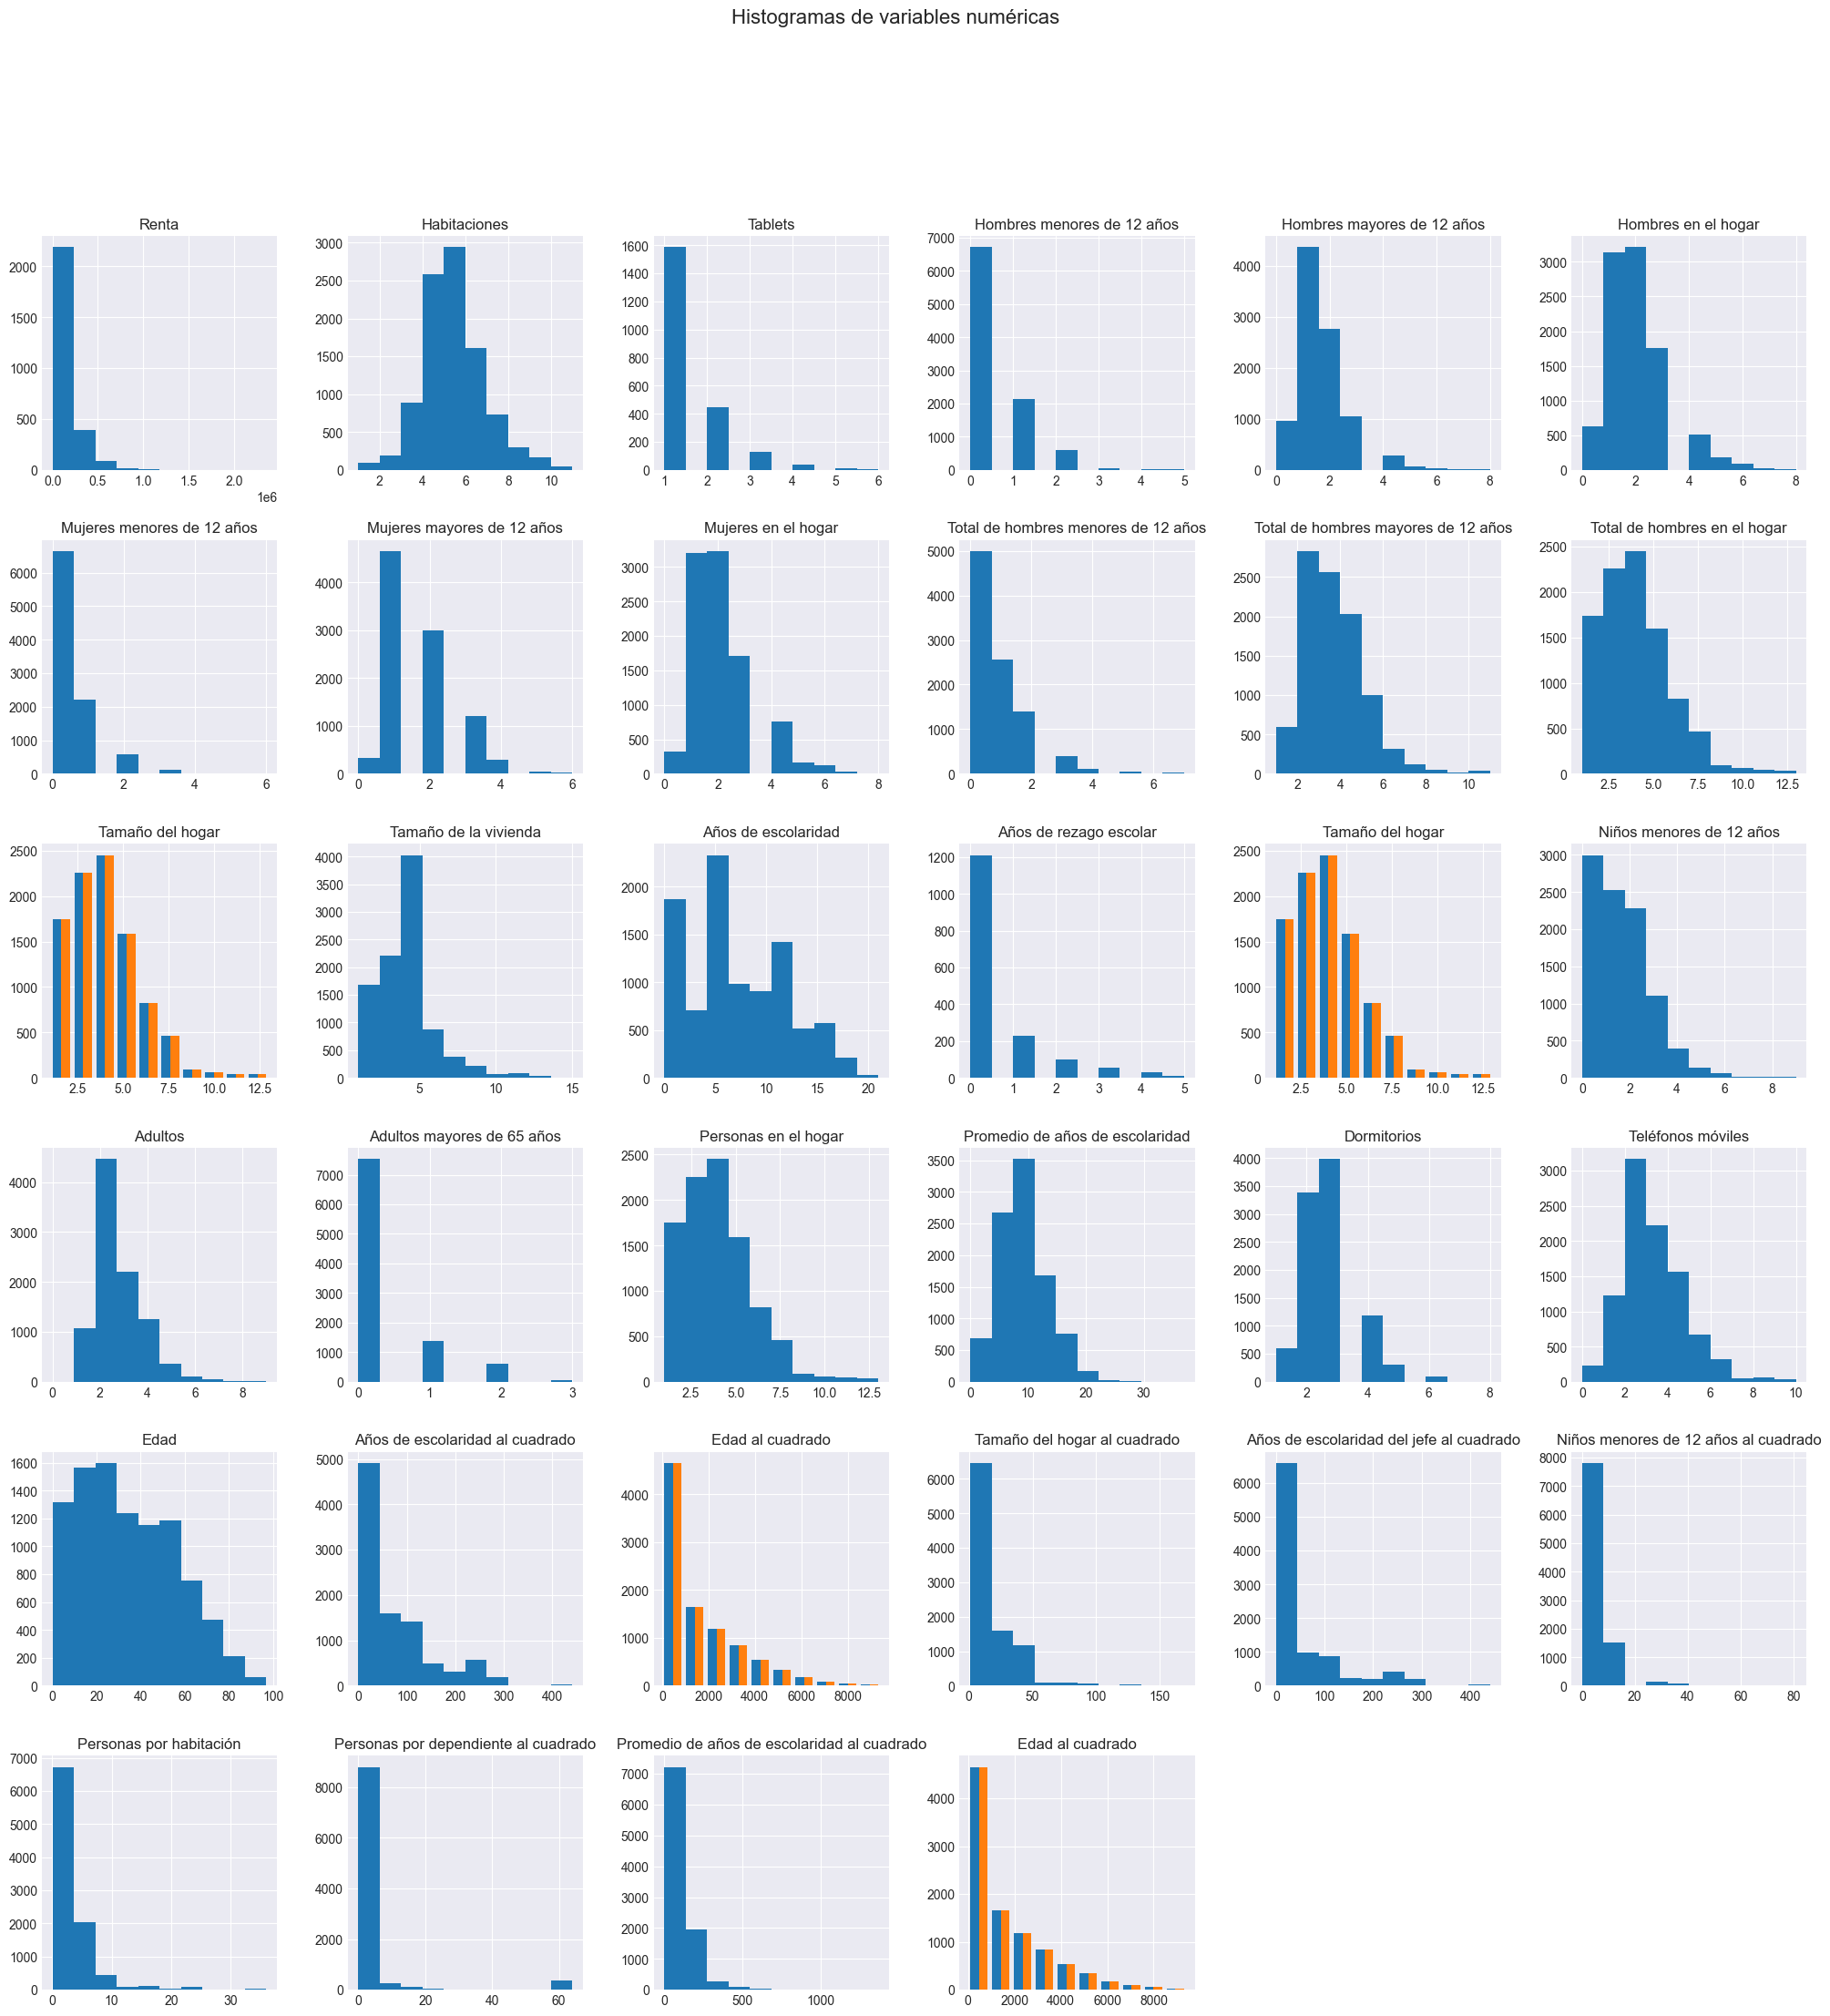

In [67]:
train[numericas].rename(columns= dict(zip(numericas, nombres))).hist(figsize=(25,25))
plt.suptitle('Histogramas de variables numéricas', fontsize=16)
plt.show()

### 4.2 Correlación entre las variables numéricas

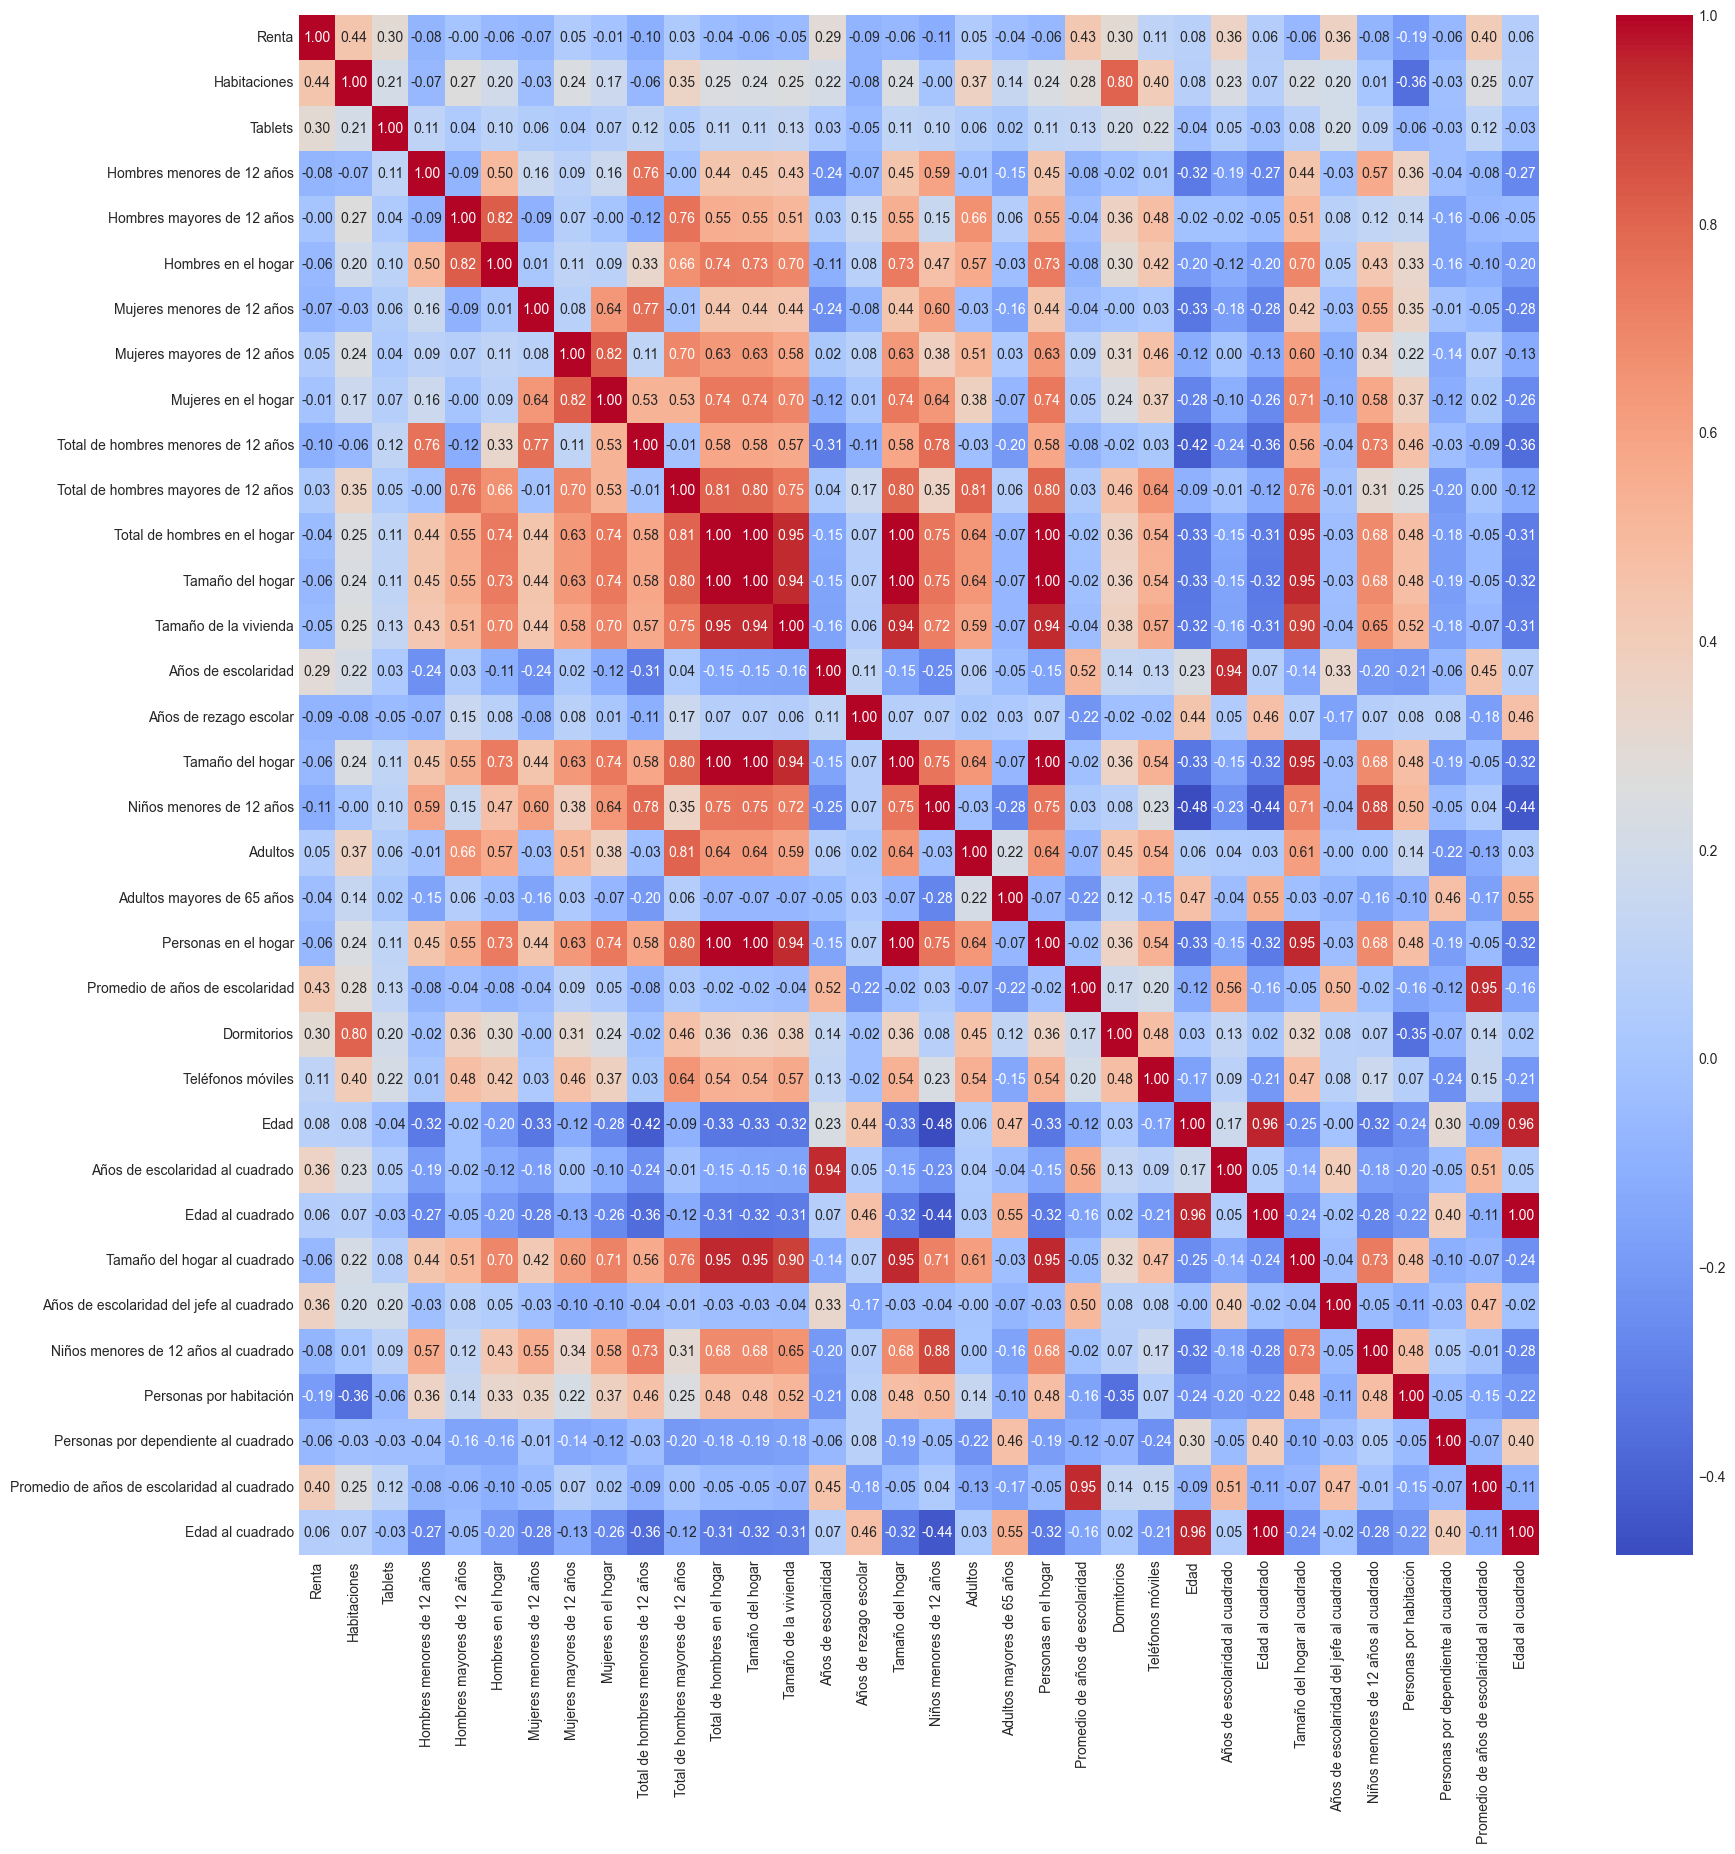

In [71]:
corr = train[numericas].rename(columns=dict(zip(numericas,nombres))).corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


